In [80]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches
import numpy as np
from pandas import set_option

In [2]:
#loading data
file = 'C:\\Users\\OWNER\\Documents\\WORKSPACE\\heart.csv'
ds= pd.read_csv(file)

In [4]:
ds.head(11)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


There are no missing values in the dataset.

In [120]:
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], dtype='object')

In [6]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


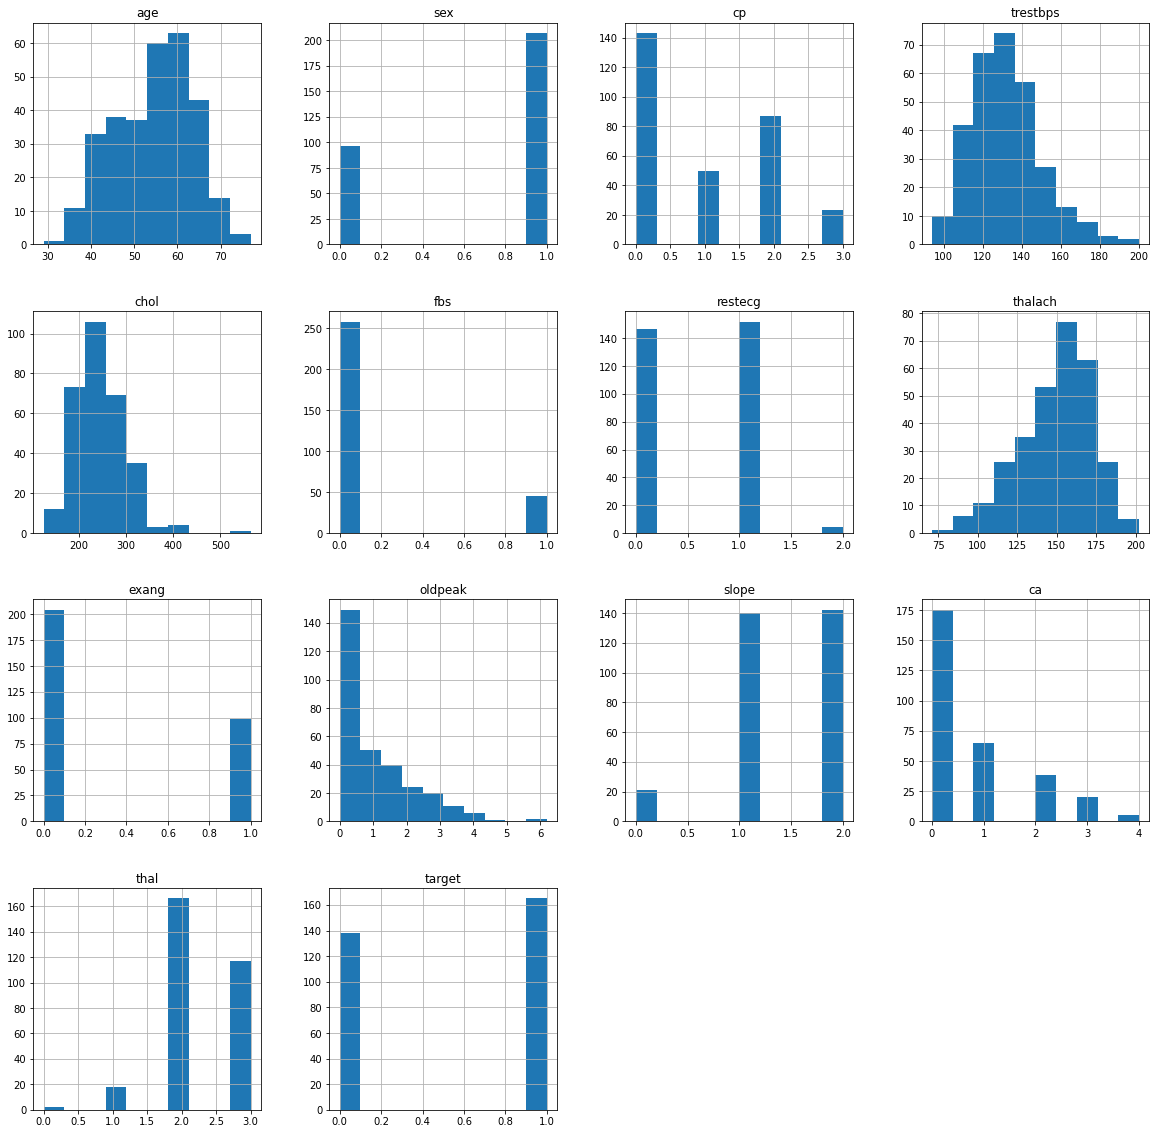

In [7]:
ds.hist()
plt.gcf().set_size_inches(20,20)
plt.show()

There is a poor distribution across the features as regards the scale 
but due to the fact we won’t be building a model that won’t be addressed right now.

# UNIVARIATE ANALYSIS
Analysis of the key features to uncover more insight about the data. 

In [8]:
print (ds['target'].value_counts())
print(ds['target'].value_counts(normalize=True))

1    165
0    138
Name: target, dtype: int64
1    0.544554
0    0.455446
Name: target, dtype: float64


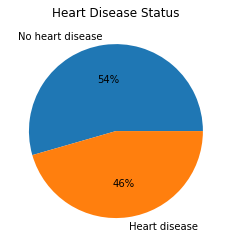

In [9]:
%matplotlib inline
x =(ds['target'].value_counts())
labels = ['No heart disease', 'Heart disease']
fig, ax = plt.subplots()
ax.pie(x, labels = labels,  autopct='%.0f%%')
ax.set_title('Heart Disease Status')
plt.show()

54% of the patients show no signs of heart disease and whilst
46% of the patients show signs of heart disease. 

In [10]:
print(ds['age'].value_counts(normalize=True))

58    0.062706
57    0.056106
54    0.052805
59    0.046205
52    0.042904
51    0.039604
62    0.036304
60    0.036304
44    0.036304
56    0.036304
41    0.033003
64    0.033003
63    0.029703
67    0.029703
65    0.026403
55    0.026403
61    0.026403
53    0.026403
45    0.026403
43    0.026403
42    0.026403
50    0.023102
66    0.023102
48    0.023102
46    0.023102
49    0.016502
47    0.016502
70    0.013201
39    0.013201
68    0.013201
35    0.013201
69    0.009901
40    0.009901
38    0.009901
71    0.009901
37    0.006601
34    0.006601
76    0.003300
29    0.003300
74    0.003300
77    0.003300
Name: age, dtype: float64


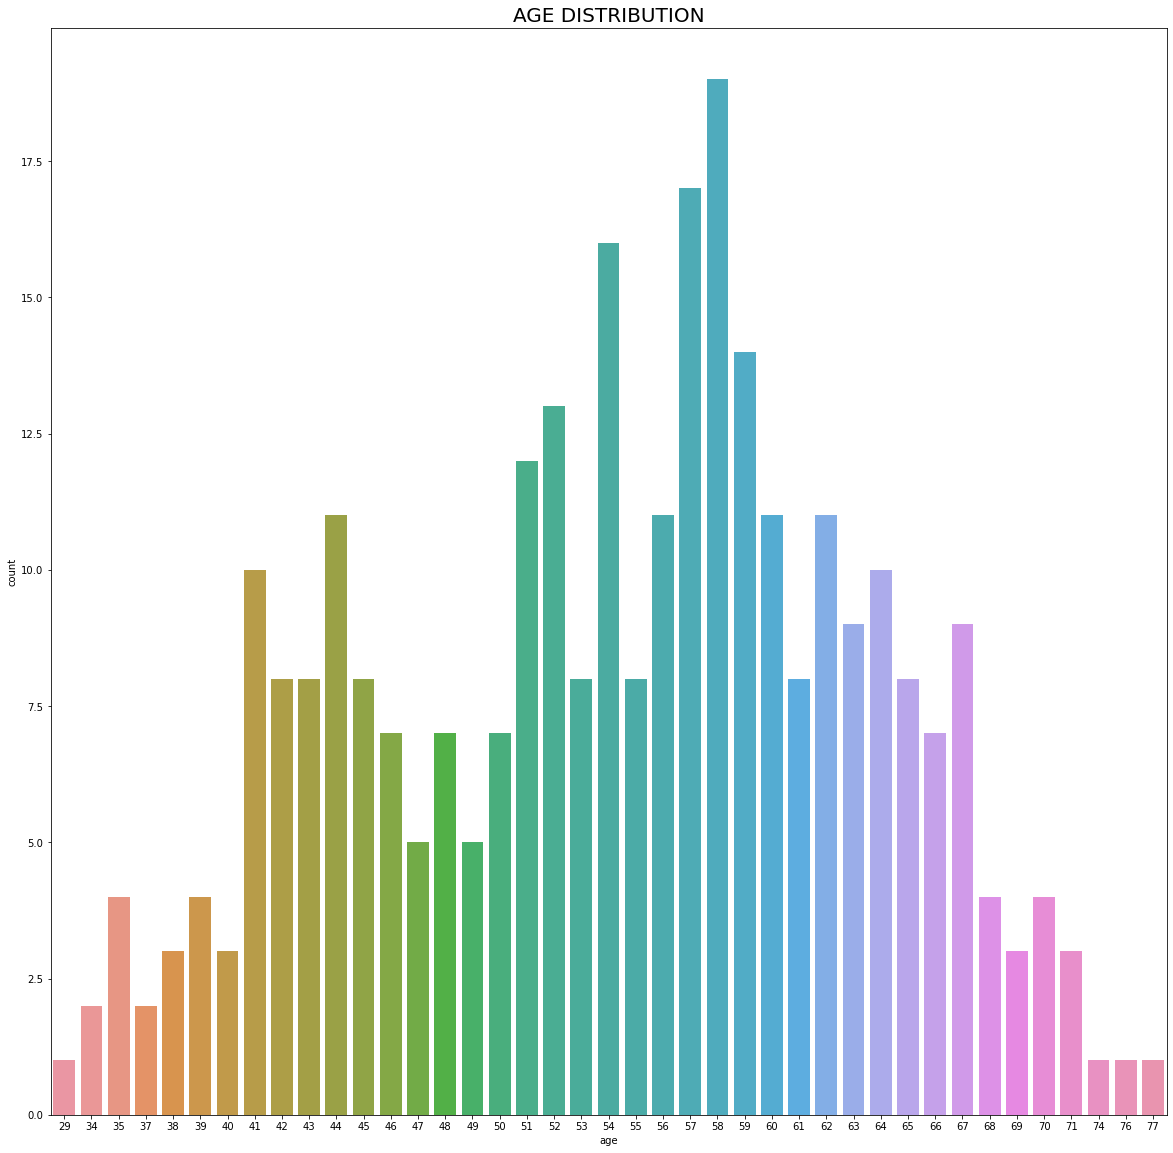

In [11]:
plt.figure(figsize = (20,20))
sb.countplot(data = ds, x='age')
plt.title('AGE DISTRIBUTION', fontsize = 20)
plt.show()

In [12]:
print (ds['sex'].value_counts())

1    207
0     96
Name: sex, dtype: int64


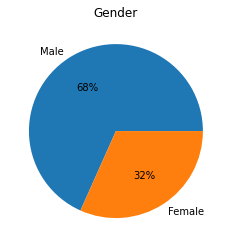

In [13]:
x =(ds['sex'].value_counts())
labels = ['Male', 'Female']
fig, ax = plt.subplots()
ax.pie(x, labels = labels,  autopct='%.0f%%')
ax.set_title('Gender')
plt.show()

68% of the patients are male whilst 32% are female
which give us information that more of the patients are male.

In [14]:
print (ds['cp'].value_counts())
print(ds['cp'].value_counts(normalize=True))

0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    0.471947
2    0.287129
1    0.165017
3    0.075908
Name: cp, dtype: float64


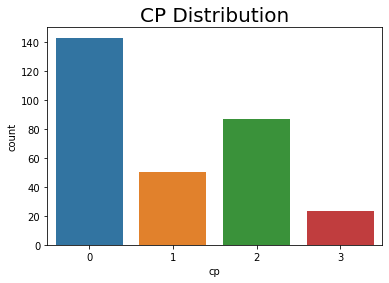

In [15]:
sb.countplot(data = ds, x='cp')
plt.title('CP Distribution', fontsize = 20)
plt.show()

47% (143) of the patients are asymptomatic 
28% (87) of the patients are atypical angina
16% (50) of the patients experience non-anginal pain
7%(23) of the patients experience typical angina. 
From the above we can see that most of the patients show no symptoms of chest related pain

In [16]:
print (ds['fbs'].value_counts())
print(ds['fbs'].value_counts(normalize=True))

0    258
1     45
Name: fbs, dtype: int64
0    0.851485
1    0.148515
Name: fbs, dtype: float64


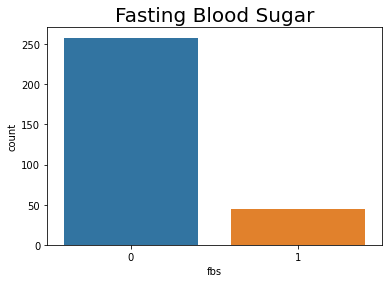

In [17]:
sb.countplot(data = ds, x='fbs')
plt.title('Fasting Blood Sugar', fontsize = 20)
plt.show()

85% of the pateints have a blood sugar level that is less than  120 mg/dl

In [18]:
print (ds['restecg'].value_counts())
print(ds['restecg'].value_counts(normalize=True))

1    152
0    147
2      4
Name: restecg, dtype: int64
1    0.501650
0    0.485149
2    0.013201
Name: restecg, dtype: float64


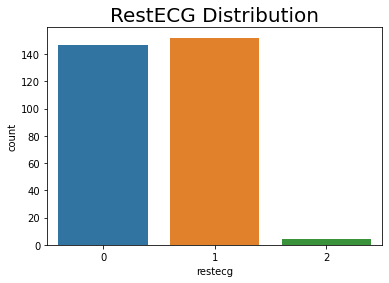

In [19]:
sb.countplot(data = ds, x='restecg')
plt.title('RestECG Distribution', fontsize = 20)
plt.show()

50% of the patients suffer from a high hypertrophy whilst 48% have a normal heart condition.

In [20]:
print (ds['exang'].value_counts())

0    204
1     99
Name: exang, dtype: int64


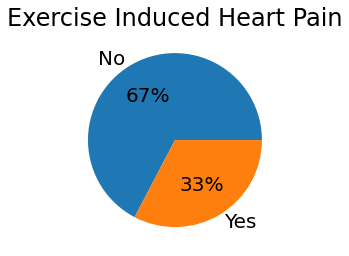

In [34]:
x =(ds['exang'].value_counts())
#plt.rcParams.update({'font.size': 20})
labels = ['No', 'Yes']
fig, ax = plt.subplots()
ax.pie(x, labels = labels,  autopct='%.0f%%')
ax.set_title('Exercise Induced Heart Pain')
plt.show()

In [22]:
print (ds['slope'].value_counts())
print(ds['slope'].value_counts(normalize=True))

2    142
1    140
0     21
Name: slope, dtype: int64
2    0.468647
1    0.462046
0    0.069307
Name: slope, dtype: float64


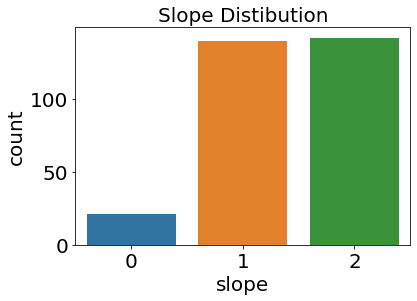

In [23]:
sb.countplot(data = ds, x='slope')
plt.title('Slope Distibution', fontsize = 20)
plt.show()

From the above chart,
46% of the patients show a flat sloping st segment,
46% of the patients also show an upsloping st segment and
6% of the patients show a downsloping st segment.

In [24]:
print (ds['thal'].value_counts())
print(ds['thal'].value_counts(normalize=True))

2    166
3    117
1     18
0      2
Name: thal, dtype: int64
2    0.547855
3    0.386139
1    0.059406
0    0.006601
Name: thal, dtype: float64


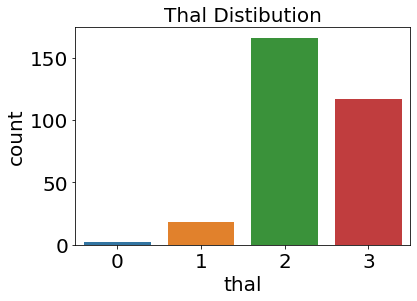

In [25]:
sb.countplot(data = ds, x='thal')
plt.title('Thal Distibution', fontsize = 20)
plt.show()

from the above chart,
54% of the patients have fixed defect thal,
38% of the patients have a reversible defect thal whilst
5% of the patients have a normal thal.

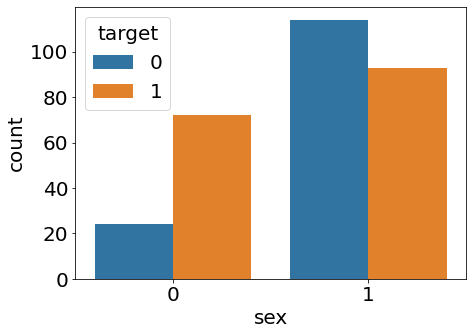

In [44]:
plt.figure(figsize = (7,5))
sb.countplot(x="sex", hue="target", data=ds)
plt.show()

From the chart we can see that more of the male patients
tend to suffer from hear disease than the female patients.

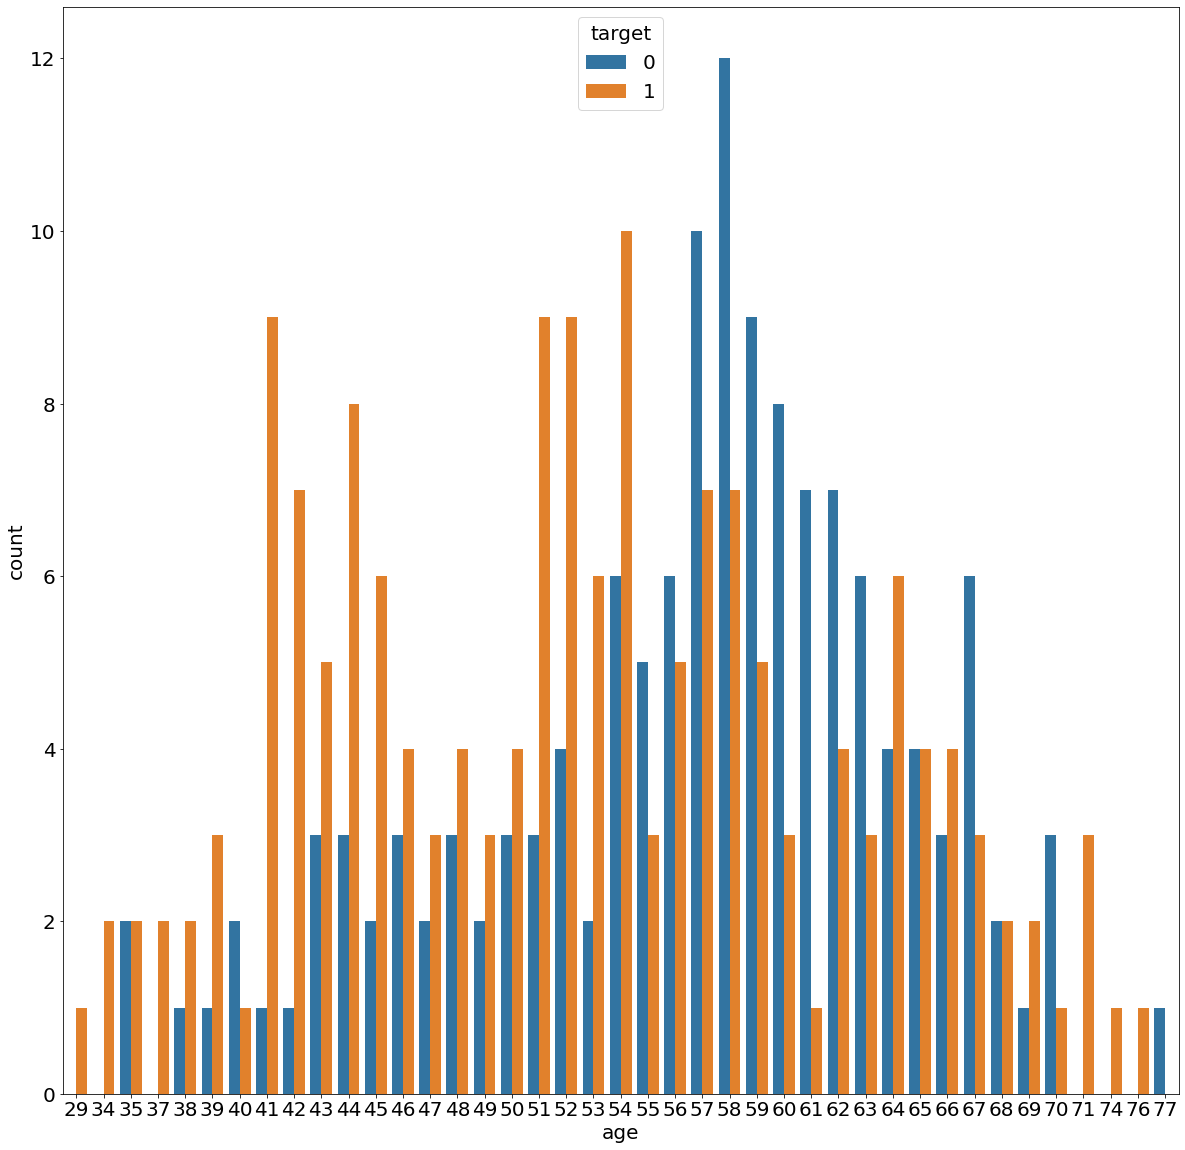

In [48]:
plt.figure(figsize = (20,20))
sb.countplot(x="age", hue="target", data=ds)
plt.show()

from the chart we can see that people within the ages of
57, 58, 59, 60, had the highest occurence of heart disease.
the age group of 29,34,37,71,74 and 76 had no cases of heart disease

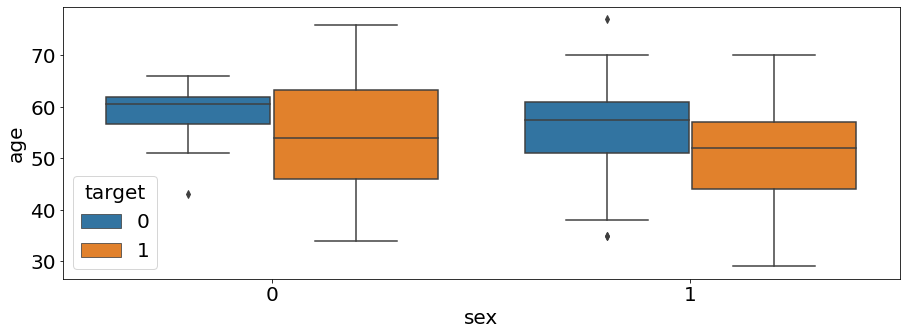

In [57]:
plt.figure(figsize = (15,5))
sb.boxplot(x="sex", y="age", hue="target", data=ds);


from the chart we can see that men between the ages from 55-60 
have a higher occurence of heart disease whilst women between
the ages of 45-60 had lower occurence of heart disease

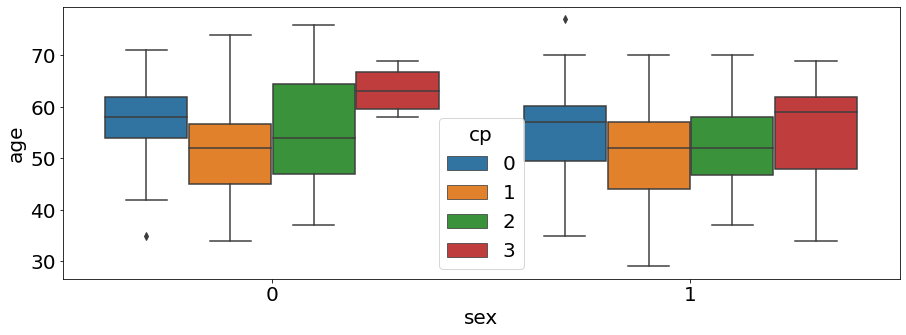

In [58]:
plt.figure(figsize = (15,5))
sb.boxplot(x="sex", y="age", hue="cp", data=ds);

This plot shows us sex and age related chest pain cases from the patients
male patients between the ages of 50-60 were asymptomatic
female patients between the ages of 55-62 were also asymptomatic
male patients between the ages of 45-58 were atypical angina
female patients between the ages of 45-58 were atypical angina also
male patients between the ages of 48-60 had non-anginal whilst
female patients between the ages of 47-64 had non-anginal also
male patients between the ages of 49-62 had typical angina whilst
female patients between the ages of 62-65 had typical angina chest pain 

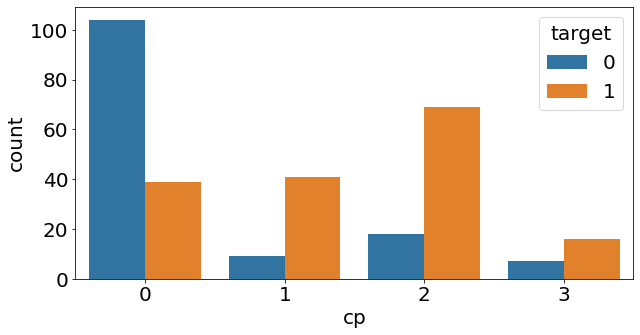

In [59]:
plt.figure(figsize = (10,5))
sb.countplot(x="cp", hue="target", data=ds)
plt.show()

from the above chart we can see that even though the patients 
were asymptomatic, they were still liable to suffer from heart disease.

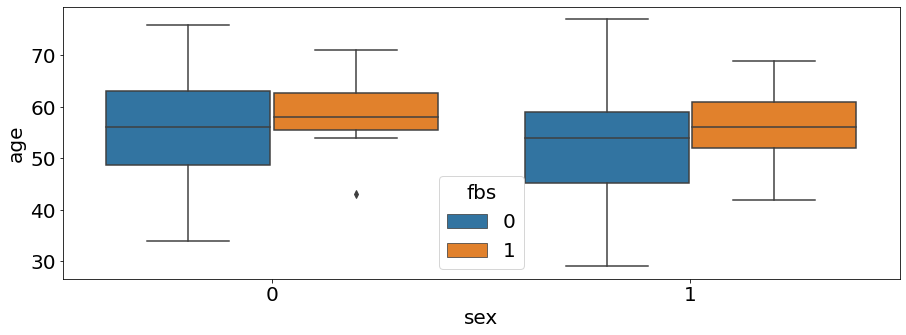

In [66]:
plt.figure(figsize = (15,5))
sb.boxplot(x="sex", y="age", hue="fbs", data=ds);

In [ ]:
This chart shows a boxplot of blood sugar leve between male and female patients 
also taking into consideration their ages.
we can see that male between the ages of 48-60 ten to have a high blood sugar level whilst
females between the the ages of 50-63 also tend to have a high level.

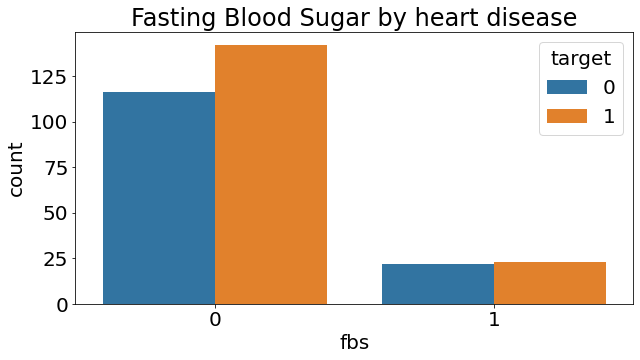

In [69]:
plt.figure(figsize = (10,5))
sb.countplot(x="fbs", hue="target", data=ds)
plt.title('Fasting Blood Sugar by heart disease')
plt.show()

This chart shows the Blood Sugar level of pateints in comparison to heart disease
we can see that those with sugar levels below 120 mg/dl
have a higher chance with no heart disease and also heart diease
this might also be a clear indication that blood sugar level alone
might not give the clearest indication of heart disease.

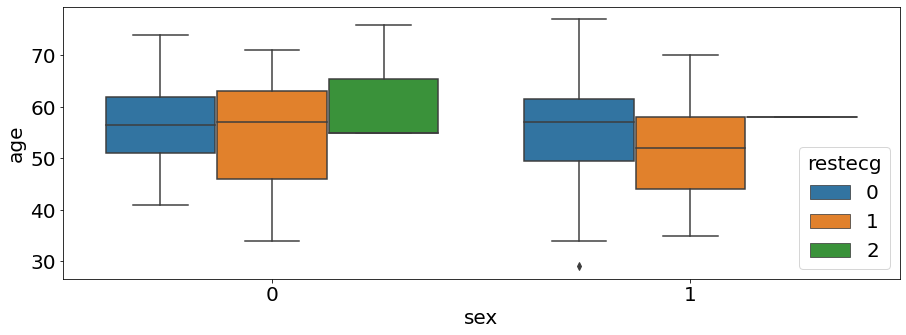

In [72]:
plt.figure(figsize = (15,5))
sb.boxplot(x="sex", y="age", hue="restecg", data=ds);

This chart shows the Resting ECG of both Female and Male and their ages.
Females within the ages of 52-62 having a definite left ventricular hypertrophy whilst
Males within the ages of 50-60 having a definite left ventricular hypertrophy
Females within the ages of 47-64 having a normal resting ECG whilst 
Males within the ages of 45-56 having a normal resting ECG
Females within the ages of 55-65 having a ST-T wave abnormality

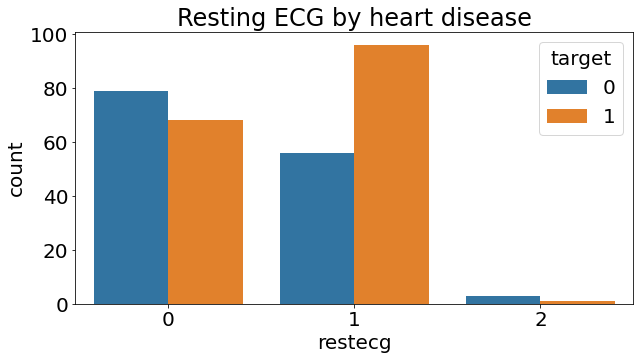

In [74]:
plt.figure(figsize = (10,5))
sb.countplot(x="restecg", hue="target", data=ds)
plt.title('Resting ECG by heart disease')
plt.show()

This chart compares The resting ECG to heart disease.
From the chart we can see that patients with a 
definite left ventricular hypertrophy are at a 
higher risk of of heart disease whilst patients with 
a normal resting ECG having a higher rate of no heart disease.

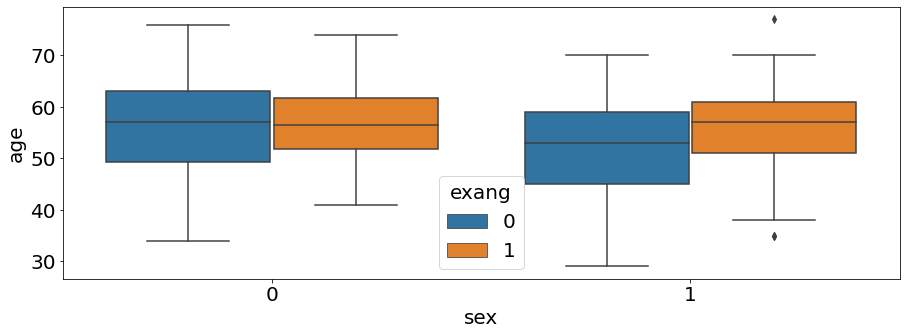

In [75]:
plt.figure(figsize = (15,5))
sb.boxplot(x="sex", y="age", hue="exang", data=ds);

This chart shows Exercise related pain in the chest
comparing it to male and female and thier ages
Females withing the ages of 50-64 expereinced exercise Induced Angina
Males withing the ages of 46-60 experienced exercise Induced Angina

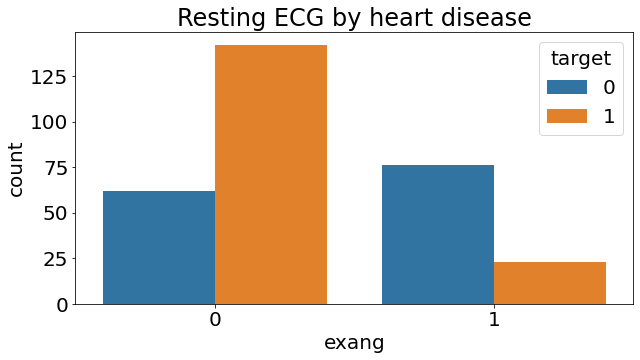

In [76]:
plt.figure(figsize = (10,5))
sb.countplot(x="exang", hue="target", data=ds)
plt.title('Resting ECG by heart disease')
plt.show()

This chart shows how Exercise Induced Angina compares to heart disease
from the chart we can see that the likelihood of no pain in the chest area during exercise ,
the less likely you are to have heart disease whilst the more you feel pain during exercise
the higher the chance of heart disease.

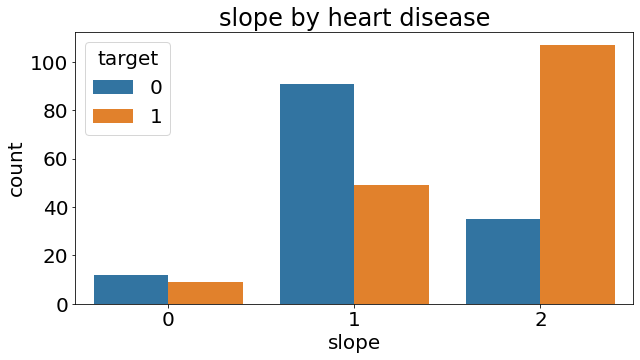

In [77]:
plt.figure(figsize = (10,5))
sb.countplot(x="slope", hue="target", data=ds)
plt.title('slope by heart disease')
plt.show()

This chart shows the slope (the slope of the peak exercise ST segment)
as it compares to heart disease
a flatslope shows a high tendecy of heart disease whilst
an upslope shows a high tendecy of no heart disease.

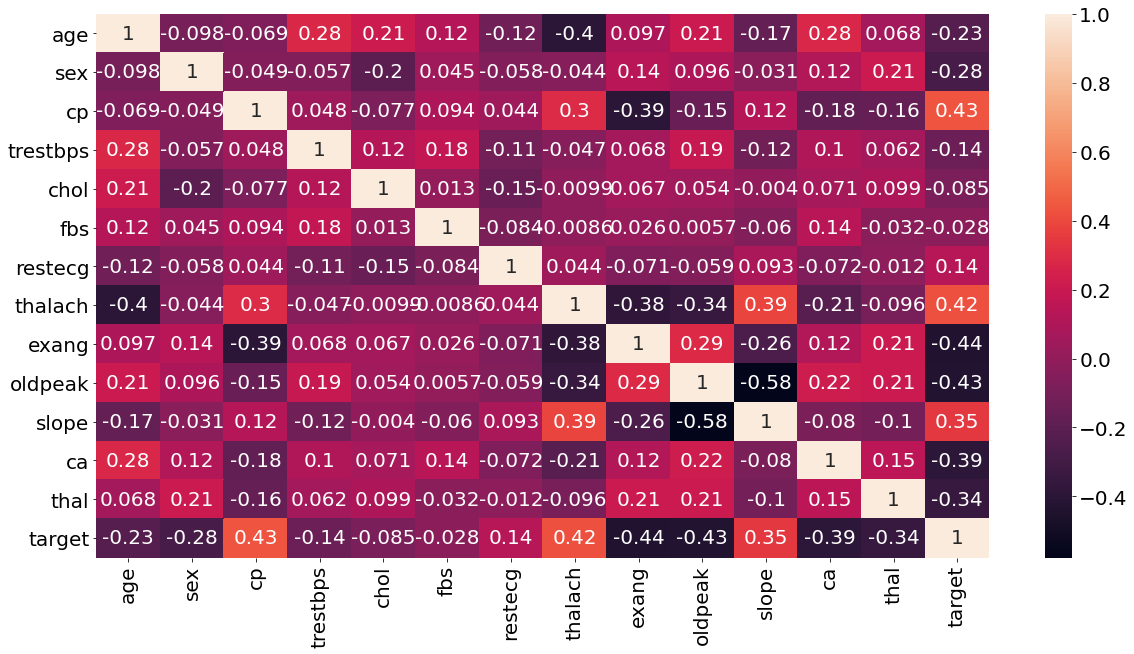

In [82]:
plt.figure(figsize = (20,10))
sb.heatmap(ds.corr(), annot = True) 
set_option ('display.width', 1000)

from the above heat map, there seems to be slight correlation between
a few features. We will try to explore that further to tease out more insights.

# Linear regression analysis

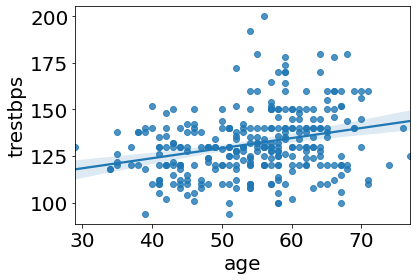

In [90]:
sb.regplot(x="age", y="trestbps", data=ds);

there is a positive correlation between age and Resting Blood Pressure
The older the age the higher the Resting Blood Pressure.

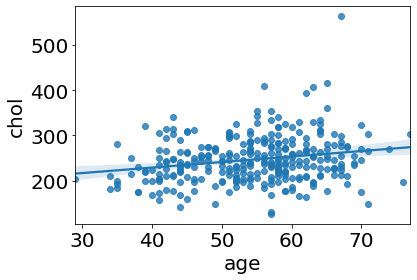

In [91]:
sb.regplot(x="age", y="chol", data=ds);

there is a positive linear correlation between age and cholesterol
the older the age, the higher the cholesterol level.

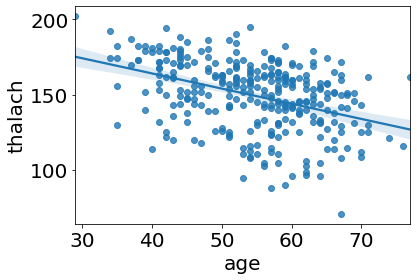

In [92]:
sb.regplot(x="age", y="thalach", data=ds);

There is a negative linear relationship between age and maximum heart rate 
achieved by patients, as age increases we can see that maximum heart rate tend to reduce.

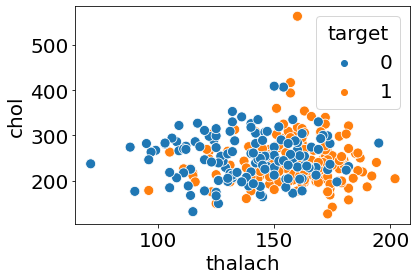

In [100]:
sb.scatterplot(x =ds.thalach, # X-axis
                y = ds.chol,  # Y-a
                hue=ds.target,  
                s=100);

from the scatter plot we can see that as cholesterol and heart rate rises
the likelihood of heart disease also does.

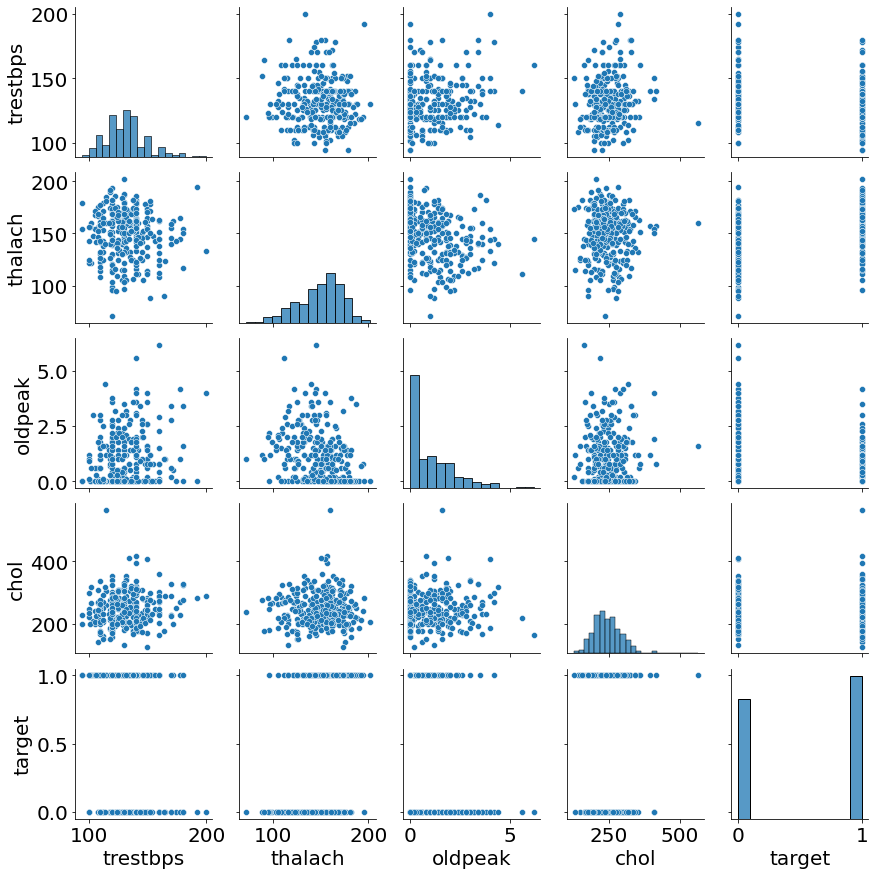

In [121]:
sb.pairplot(ds[['trestbps', 'thalach', 'oldpeak', 'chol','target' ]])
plt.show()

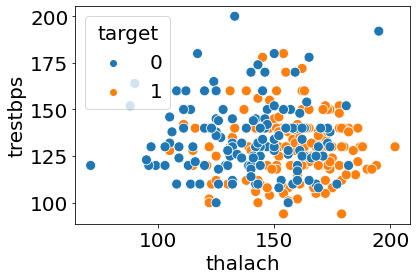

In [114]:
sb.scatterplot(x =ds.thalach, # X-axis
                y = ds.trestbps,  # Y-a
                hue=ds.target,  
                s=100);

A high heart rate and also a high blood sugar level has an effect
on the rate of heart disease as it can be seen on this chart.

In [ ]:
conclusion 
from the above I was able to carry out a
Univariate, Bivariate and Linear regression analysis on the data
features such as age, chol(cholesterol), fbs (fasting blood sugar)
trestbps(resting blood sugar), thalach (maximum heart rate)
restecg (Resting ECG), cp(Chest Pain Type) were the major drivers 
in terms of predicting the likelihood of a patient getting heart disease
relatioships across thsese feature enables significant knowledge about
the prediction of heart disease.